# Linear Regression

L'exemple ci-dessous utilise uniquement la première caractéristique de l'ensemble de données sur le diabète, afin d'illustrer les points de données dans le graphique bidimensionnel.
La ligne droite est visible dans le graphique, montrant comment la régression linéaire tente de tracer une ligne droite qui minimisera au mieux la somme résiduelle des carrés entre les réponses observées dans l'ensemble de données et les réponses prédites par l'approximation linéaire.
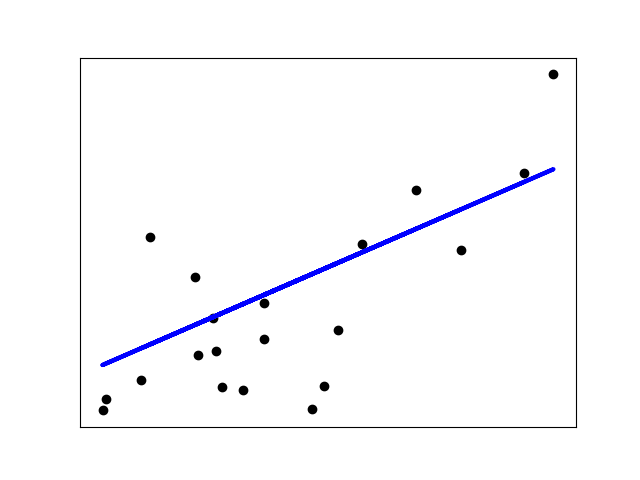

In [1]:
#import librairies
import pandas as pd

In [2]:
#read datase 'diabetes_simple.csv'
data = pd.read_csv('diabetes_simple.csv')
data.head()

,Glucose,BloodPressure
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [4]:
#Check for missing values

data.isnull().sum()

Glucose          0
BloodPressure    0
dtype: int64

In [5]:
data.shape

(442, 2)

In [9]:
#Seperate features ((independent variables) and label (dependent variable))
y = data['BloodPressure'] #  variable dependante (axe des ordonnees)
x = data['Glucose'] # variable independante (axes des x)

In [10]:
#print features (independent varibales)
x

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: Glucose, Length: 442, dtype: float64

In [11]:
#print target variable (variable dependante: BloodPressure)
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: BloodPressure, Length: 442, dtype: float64

In [13]:
type(y)

pandas.core.series.Series

In [12]:
y.shape

(442,)

In [ ]:
#modele de regression lineaire simple (une seule variable independante)

In [14]:
#reshape to (nb  de lignes , 1) (nb d'echantillons, nb de variables dependantes)
import numpy as np
y = np.array(y).reshape(442, 1)
#en applant la fonction fit sur LinearRegression


In [15]:
y.shape

(442, 1)

In [73]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9) #shuffle = False, random_state = 1

In [74]:
x_train.shape

(397,)

In [75]:
x_train = np.array(x_train).reshape(-1,1)#.reshape(-1,1) # regression simple

In [76]:
y_train.shape

(397, 1)

In [77]:
x_test.shape

(45,)

In [78]:
x_test = np.array(x_test).reshape(-1,1)
x_test.shape

(45, 1)

In [79]:
type(x_test)

numpy.ndarray

In [ ]:
x_test = pd.DataFrame(x_test)# conversion en dataframe

## Linear Regression Model

In [80]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
#train the model
regressor.fit(x_train, y_train)

LinearRegression()

In [81]:
#intercept a0
a0 = regressor.intercept_[0]
a0

151.34549900454167

In [82]:
a1 = regressor.coef_[0][0]
a1

979.3119871499356

In [83]:
print(f"BloodPressure = {round(a0,2)} + {round(a1,2)} *Glucose")

BloodPressure = 151.35 + 979.31 *Glucose


In [36]:
y_train_pred = regressor.predict(x_train)
y_train_pred[:5]

array([[167.95075578],
       [210.51322688],
       [157.56966527],
       [ 72.44472307],
       [164.83642863]])

In [37]:
y_train[:5]

array([[ 96.],
       [268.],
       [ 48.],
       [101.],
       [235.]])

In [37]:
#valeur reelle de blood pressure des premiers 4 echantillons de testing


array([[200.],
       [153.],
       [ 84.],
       [151.]])

In [88]:
#prediction
y_test_pred = regressor.predict(x_test)


#prediction des premiers 4 echantillons de testing


y_test_temp = regressor.predict(x_test[:4])
y_test_temp

array([[ 68.21539101],
       [138.93484802],
       [127.3241909 ],
       [152.65653371]])

In [46]:
np.array([[-0.02],
          [0.5]
         ]).shape

(2, 1)

In [48]:
#glucose = -0.02
#glucose = 0.5
regressor.predict(np.array([[-0.02], [0.5]])) #(nb_echantillons_testing, nb_de_var_independantes)

array([[133.9026558 ],
       [634.74758018]])

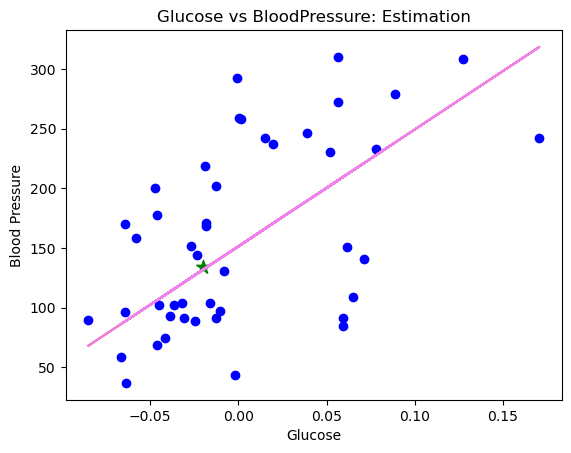

In [89]:
#tracer les nuages des points
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color = 'blue', label = "Original Points")
plt.plot(x_test, y_test_pred, color = 'red', label = "Estimated Points with Linear Regression")
plt.plot(x_test, a0+a1*x_test, color = "violet")
plt.scatter(-0.02,133.9026558, marker='*', color = 'green', s = 105 )
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.title("Glucose vs BloodPressure: Estimation")
plt.show()


In [56]:
#y = ax+b
#blood_pressure  = a * glucose + b =

#Trouver le coef a


1005.1621770654355

In [52]:
#trouver l'intercept b


153.79156059669367

In [90]:
#Evaluate the model using r2-score metrics

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred) #proche de 1

0.258302603384178

In [52]:
#evaluer le  mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

3927.6075812741333

In [63]:
#calcuer MSE manuellement
np.sum((y_test-y_test_pred)**2)/(y_test.shape[0])

3927.6075812741333

In [83]:
new_data = np.array([
    [1.25], #1er echantillon
    [0.1] # 2eme echantillon
])

#en cas de regression multilineaire
new_data = np.array([
    [1.25, 3, 25,...], #1er echantillon
    [0.1] # 2eme echantillon
])

#ca ne marche pas ! new_data = np.array([1.25, 0.1])